In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import VGG16, MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
import os
import random 
import shutil
import itertools

In [3]:
os.chdir("C:\\Users\\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\")

In [4]:
List_of_healthy_food = ["apple", "banana", "beetroot", "bell pepper", "cabbage", "capsicum", "carrot", "cauliflower", "chilli pepper", "corn", "cucumber", "eggplant", "garlic", "ginger", "grapes", "jalepeno", "kiwi", "lemon", "lettuce", "mango", "onion", "orange", "paprika", "pear", "peas", "pineapple", "potato", "pomegranate", "raddish", "soy beans", "spinach", "sweetcorn", "sweetpotato", "tomato", "turnip", "watermelon"]

In [5]:
if os.path.isdir("C:\\Users\\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\train\\") is False:
    os.makedirs("C:\\Users\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\train\\")
    os.makedirs("C:\\Users\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\valid\\")
    os.makedirs("C:\\Users\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\test\\")
    
    for i in List_of_healthy_food:
        shutil.move(f"C:\\Users\\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\{i}", "C:\\Users\Vivek K N\\Dogs-vs-Cats Dataset\\Vegetables and Fruits Detection Dataset\\train")
        os.mkdir(f"C:\\Users\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\valid\\{i}")
        os.mkdir(f"C:\\Users\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\test\\{i}")
        
        valid_samples = random.sample(os.listdir(path=f"C:\\Users\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\train\\{i}"), 3)
        for j in valid_samples:
            shutil.move(f"C:\\Users\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\train\\{i}\\{j}", f"C:\\Users\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\valid\\{i}")
            
        test_samples = random.sample(os.listdir(path=f"C:\\Users\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\train\\{i}"), 2)
        
        for k in test_samples:
            shutil.move(f"C:\\Users\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\train\\{i}\\{k}", f"C:\\Users\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\test\\{i}")

In [6]:
train_path = "C:\\Users\\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\train\\"
valid_path = "C:\\Users\\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\valid\\"
test_path = "C:\\Users\\Vivek K N\\Images Dataset\\Vegetables and Fruits Detection Dataset\\test\\"

In [7]:
train_samples = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = train_path, batch_size=2, target_size=(224,224))
test_samples = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = test_path, batch_size=2, target_size=(224,224))
valid_samples = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory = valid_path, batch_size=2, target_size=(224,224), shuffle=False)

Found 179 images belonging to 36 classes.
Found 72 images belonging to 36 classes.
Found 108 images belonging to 36 classes.


In [8]:
assert train_samples.n == 179
assert test_samples.n == 72
assert valid_samples.n == 108
assert train_samples.num_classes == test_samples.num_classes == valid_samples.num_classes

In [9]:
image, labels = next(train_samples)

In [10]:
def plot_Images(images_array):
    fig, axes = plt.subplots(1, 10, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(images_array, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

The Above Function is standared function to display the images of the dataset when images is passed as argument in form of image array.

## Training The Model Using VGG16 Architecture

In [11]:
Models = tf.keras.applications.vgg16.VGG16()

In [12]:
Models.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model = Sequential()
for layers in Models.layers[:-1]:
    model.add(layers)

In [14]:
for layer in model.layers:
    layer.trainable = False

In [15]:
model.add(Dense(units=36, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

## Train The Model

In [17]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [18]:
predictions = model.predict(x=test_samples, verbose=0)

In [19]:
cm = confusion_matrix(test_samples.classes, np.argmax(predictions, axis=1))

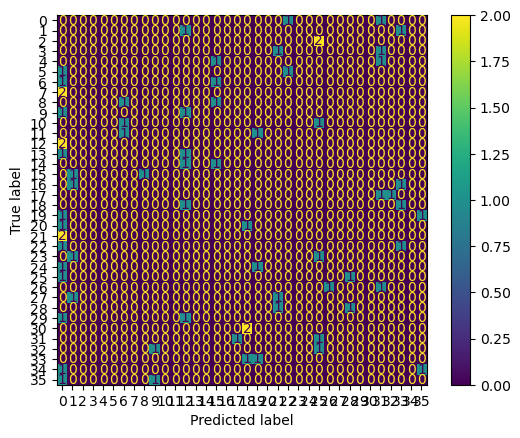

In [20]:
ConfusionMatrixDisplay(cm).plot()